<a href="https://colab.research.google.com/github/shahchayan9/Dimensionality-Reduction/blob/main/KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA
## Explanation and Use Cases

**Kernel Principal Component Analysis (Kernel PCA)** is a nonlinear dimensionality reduction technique that is an extension of traditional Principal Component Analysis (PCA). While PCA is effective in linearly transforming the data into a lower-dimensional space, Kernel PCA allows for the projection of data into a higher-dimensional space using kernel functions, making it suitable for complex, nonlinear relationships between the data points.

## How Kernel PCA Works

### 1. Linear PCA Overview:
PCA identifies the directions (principal components) that maximize the variance in a dataset by performing an eigenvalue decomposition of the covariance matrix. This is effective when the data lies on a linear subspace.

### 2. Limitations of Linear PCA:
PCA struggles when the data has nonlinear relationships. For example, it cannot capture complex structures like spirals or concentric circles.

### 3. Introducing Kernel Functions:
Kernel PCA solves this problem by first mapping the original data into a higher-dimensional feature space using a kernel function. In this space, the data may become linearly separable or follow simpler patterns that can be captured by PCA.

### 4. Kernel Trick:
Instead of explicitly mapping the data to a higher-dimensional space, Kernel PCA uses a *kernel trick*, which computes the inner product between data points in the higher-dimensional space without explicitly calculating the transformation. This is computationally efficient. Common kernel functions include:
- **Linear Kernel:** No mapping; same as PCA.
- **Polynomial Kernel:** Maps data to a higher-dimensional space using polynomial functions.
- **Radial Basis Function (RBF) or Gaussian Kernel:** Maps data into an infinite-dimensional space and is effective in handling highly nonlinear data.
- **Sigmoid Kernel:** Based on the sigmoid function, used in some neural network architectures.

### 5. Steps in Kernel PCA:
1. **Step 1:** Choose an appropriate kernel function (e.g., Gaussian or polynomial).
2. **Step 2:** Compute the kernel matrix \( K \) where each element represents the kernel function applied to pairs of data points.
3. **Step 3:** Center the kernel matrix by subtracting the mean of each row and column (similar to centering the data in standard PCA).
4. **Step 4:** Perform eigenvalue decomposition on the centered kernel matrix to find the principal components.
5. **Step 5:** Project the data onto these principal components to reduce its dimensionality.

## Mathematical Formulation

Given a set of data points \( x_1, x_2, ..., x_n \), the kernel function computes the similarity between pairs of points in the original space, represented as \( K(x_i, x_j) \). After computing the kernel matrix \( K \), the rest of the PCA procedure follows, but operating on this kernel matrix instead of the data matrix.

## Use Cases of Kernel PCA

### 1. Nonlinear Dimensionality Reduction:
Kernel PCA is particularly useful when dealing with data that does not exhibit linear relationships but has inherent nonlinear structure. Examples include:
- **Image processing:** Reducing the dimensionality of high-dimensional image data, where the variation in the data may not be linear.
- **Speech recognition:** Identifying hidden patterns in speech features that are not linearly separable.

### 2. Data Preprocessing for Machine Learning:
Kernel PCA can be used as a preprocessing step before applying machine learning algorithms like SVM, clustering algorithms, or neural networks. By reducing the dimensionality in a nonlinear manner, Kernel PCA helps improve the performance of these algorithms by simplifying the data structure.
   
### 3. Pattern Recognition and Anomaly Detection:
In cases where data contains nonlinear relationships, Kernel PCA can help identify patterns or anomalies that might be missed by linear methods. For instance:
- **Fault detection in machinery:** Detecting subtle nonlinear changes in sensor data.
- **Fraud detection:** Identifying unusual patterns in transaction data.

### 4. Kernel PCA in Clustering:
When applying clustering algorithms (e.g., k-means), Kernel PCA can be used to first reduce the dimensionality of the data in a nonlinear space. This may make it easier to find meaningful clusters in the data that would be difficult to detect in the original space.

### 5. Visualizing Complex Data:
Kernel PCA is also used for visualizing high-dimensional, nonlinear data. By projecting the data into two or three dimensions, it becomes possible to visually inspect the structure of the data.

## Advantages of Kernel PCA
- **Handles Nonlinear Data:** It can uncover hidden structures in the data that linear PCA cannot.
- **Flexibility with Kernels:** The choice of kernel function allows Kernel PCA to be customized for different types of data and problems.
- **Effective for Complex Datasets:** It works well for datasets where the relationships between features are not linearly separable.

## Disadvantages of Kernel PCA
- **Computationally Expensive:** Kernel PCA involves calculating the kernel matrix and performing eigenvalue decomposition, which can be computationally intensive for large datasets.
- **Choice of Kernel and Parameters:** Selecting the right kernel function and tuning its parameters (e.g., the bandwidth of the RBF kernel) can be challenging.
- **Interpretability:** The new dimensions in the transformed space are not as interpretable as in linear PCA.

## Conclusion
In summary, Kernel PCA is a powerful tool for reducing the dimensionality of data when there are complex, nonlinear relationships present. It has applications in fields like image recognition, speech analysis, and pattern detection. However, it comes with higher computational costs and challenges in selecting the right kernel and tuning parameters.



---

<br>

This example shows the difference between the Principal Components Analysis (PCA) and its kernelized version (KernelPCA).

On the one hand, we show that KernelPCA is able to find a projection of the data which linearly separates them while it is not the case with PCA.

Finally, we show that inverting this projection is an approximation with KernelPCA, while it is exact with PCA.

# Projecting data: PCA vs. KernelPCA
In this section, we show the advantages of using a kernel when projecting data using a Principal Component Analysis (PCA). We create a dataset made of two nested circles.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Let’s have a quick first look at the generated dataset.

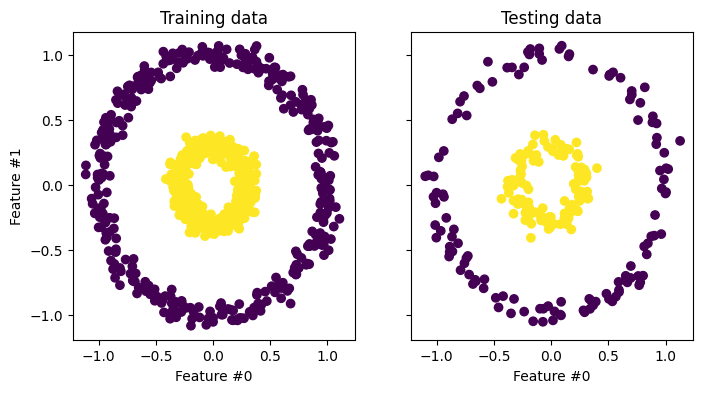

In [ ]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

The samples from each class cannot be linearly separated: there is no straight line that can split the samples of the inner set from the outer set.

Now, we will use PCA with and without a kernel to see what is the effect of using such a kernel. The kernel used here is a radial basis function (RBF) kernel.

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

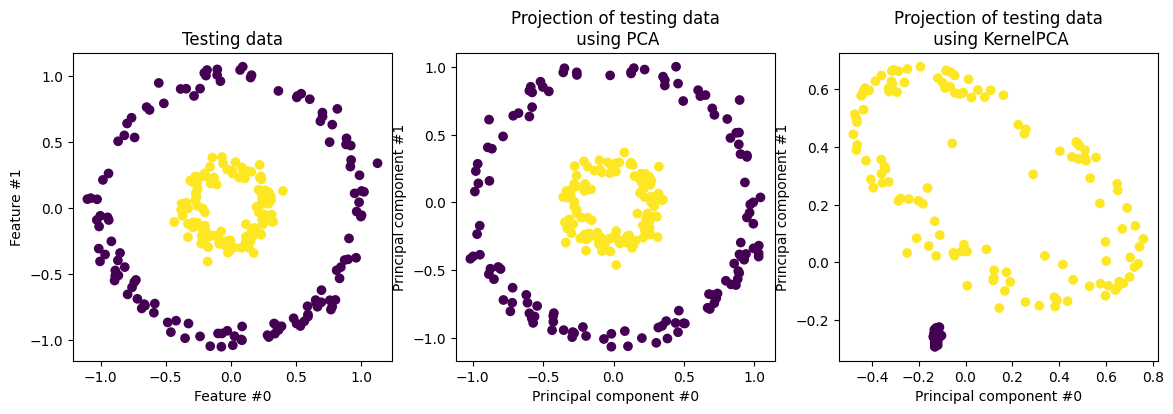

In [ ]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

We recall that PCA transforms the data linearly. Intuitively, it means that the coordinate system will be centered, rescaled on each component with respected to its variance and finally be rotated. The obtained data from this transformation is isotropic and can now be projected on its principal components.

<br>

Thus, looking at the projection made using PCA (i.e. the middle figure), we see that there is no change regarding the scaling; indeed the data being two concentric circles centered in zero, the original data is already isotropic. However, we can see that the data have been rotated. As a conclusion, we see that such a projection would not help if define a linear classifier to distinguish samples from both classes.

<br>

Using a kernel allows to make a non-linear projection. Here, by using an RBF kernel, we expect that the projection will unfold the dataset while keeping approximately preserving the relative distances of pairs of data points that are close to one another in the original space.

<br>

We observe such behaviour in the figure on the right: the samples of a given class are closer to each other than the samples from the opposite class, untangling both sample sets. Now, we can use a linear classifier to separate the samples from the two classes.


---


# Projecting into the original feature space
One particularity to have in mind when using KernelPCA is related to the reconstruction (i.e. the back projection in the original feature space). With PCA, the reconstruction will be exact if n_components is the same than the number of original features. This is the case in this example.

We can investigate if we get the original dataset when back projecting with KernelPCA.

In [ ]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

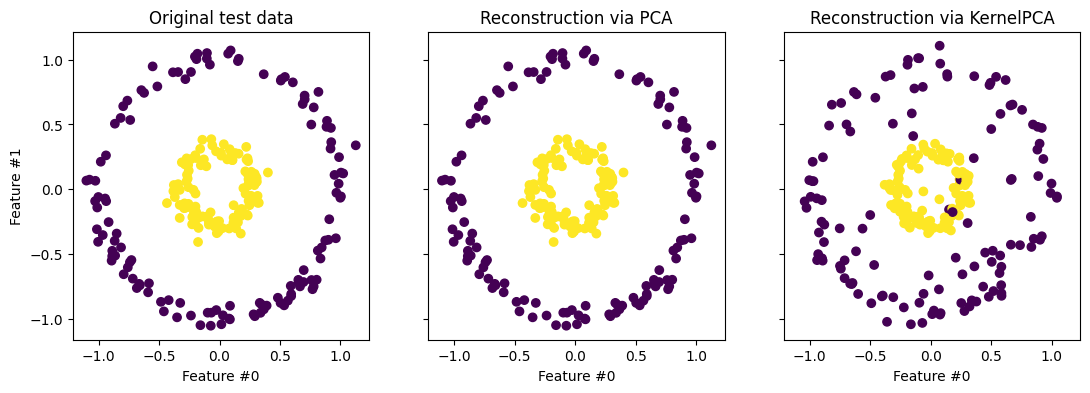

In [ ]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

While we see a perfect reconstruction with PCA we observe a different result for KernelPCA.

<br>

Indeed, inverse_transform cannot rely on an analytical back-projection and thus an exact reconstruction. Instead, a KernelRidge is internally trained to learn a mapping from the kernalized PCA basis to the original feature space. This method therefore comes with an approximation introducing small differences when back projecting in the original feature space.

<br>

To improve the reconstruction using inverse_transform, one can tune alpha in KernelPCA, the regularization term which controls the reliance on the training data during the training of the mapping.

<br>

Total running time of the script: (0 minutes 0.711 seconds)